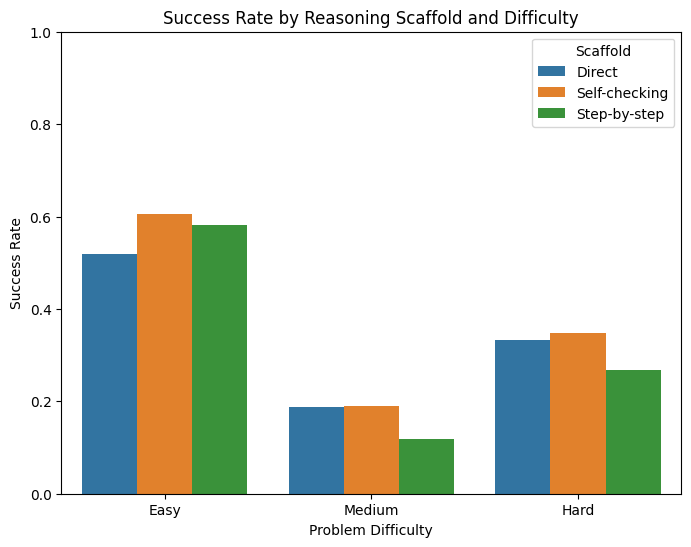

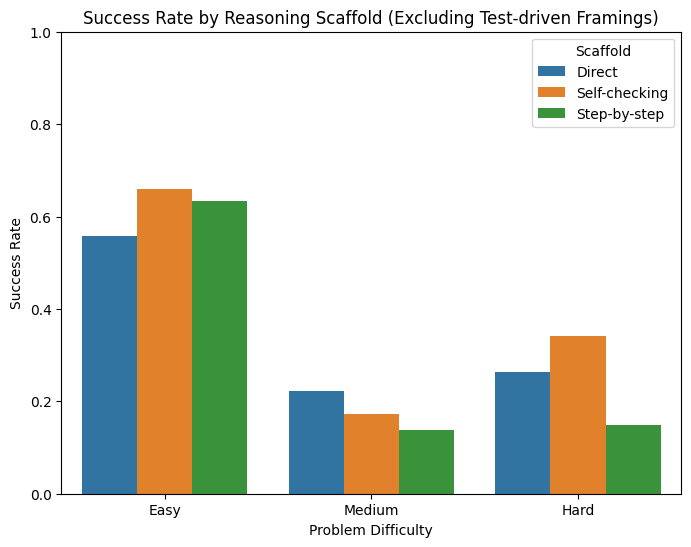

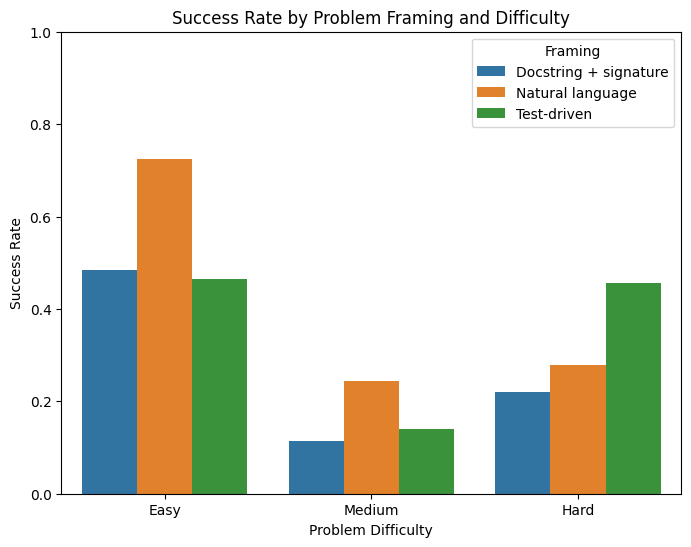

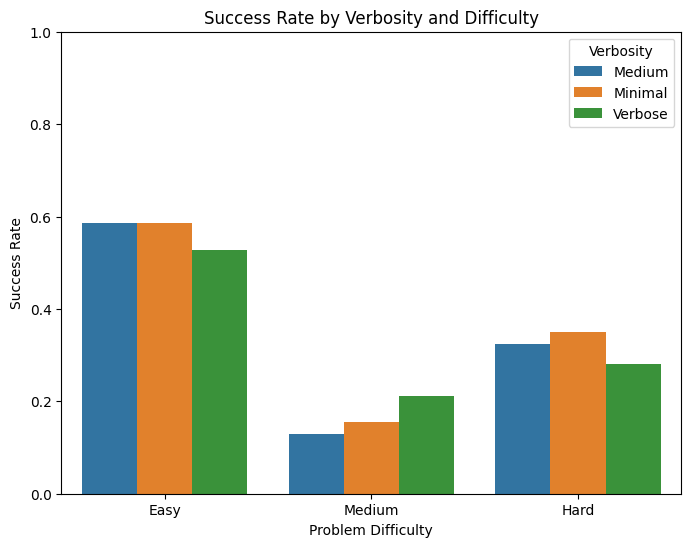

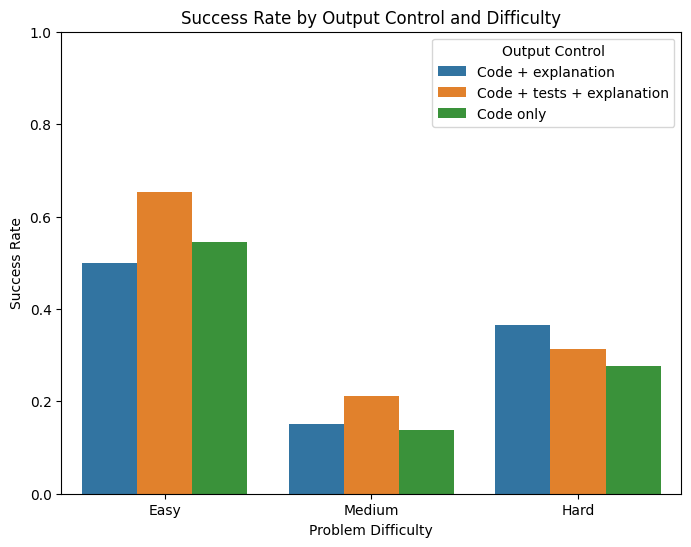

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import json
import pandas as pd

model = "qwen"
files = [f"./results/results_easy_{model}.json", f"./results/results_medium_{model}.json", f"./results/results_hard_{model}.json"]
all_data = []

for f in files:
    with open(f) as infile:
        all_data.extend(json.load(infile))

df = pd.DataFrame(all_data)

# Focus on prompt dimensions + outcome
df = df[["problem", "framing", "scaffold", "verbosity", "output", "passed", "error"]]

# Group by difficulty (problem) and scaffold
scaffold_perf = df.groupby(["problem", "scaffold"])["passed"].mean().reset_index()

# Rename problems for cleaner axis labels
scaffold_perf["problem"] = scaffold_perf["problem"].str.replace(" – .*", "", regex=True)

order = ["Easy", "Medium", "Hard"]

# Plot
plt.figure(figsize=(8,6))
sns.barplot(
    data=scaffold_perf,
    x="problem", 
    y="passed", 
    hue="scaffold",
    order=order
)

plt.title("Success Rate by Reasoning Scaffold and Difficulty")
plt.ylabel("Success Rate")
plt.xlabel("Problem Difficulty")
plt.ylim(0, 1)
plt.legend(title="Scaffold")
plt.show()

################################

# Filter out Test-driven framings
df_no_test = df[df["framing"] != "Test-driven"]

# Group by difficulty (problem) and scaffold
scaffold_perf = df_no_test.groupby(["problem", "scaffold"])["passed"].mean().reset_index()

# Clean up problem names (just "Easy", "Medium", "Hard")
scaffold_perf["problem"] = scaffold_perf["problem"].str.replace(" – .*", "", regex=True)

# Set categorical order
order = ["Easy", "Medium", "Hard"]

# Plot
plt.figure(figsize=(8,6))
sns.barplot(
    data=scaffold_perf,
    x="problem", 
    y="passed", 
    hue="scaffold",
    order=order
)

plt.title("Success Rate by Reasoning Scaffold (Excluding Test-driven Framings)")
plt.ylabel("Success Rate")
plt.xlabel("Problem Difficulty")
plt.ylim(0, 1)
plt.legend(title="Scaffold")
plt.show()

################################

# Group by difficulty and framing
framing_perf = df.groupby(["problem", "framing"])["passed"].mean().reset_index()
framing_perf["problem"] = framing_perf["problem"].str.replace(" – .*", "", regex=True)

order = ["Easy", "Medium", "Hard"]

plt.figure(figsize=(8,6))
sns.barplot(
    data=framing_perf,
    x="problem", 
    y="passed", 
    hue="framing",
    order=order
)

plt.title("Success Rate by Problem Framing and Difficulty")
plt.ylabel("Success Rate")
plt.xlabel("Problem Difficulty")
plt.ylim(0, 1)
plt.legend(title="Framing")
plt.show()

################################

# Group by difficulty and verbosity
verbosity_perf = df.groupby(["problem", "verbosity"])["passed"].mean().reset_index()
verbosity_perf["problem"] = verbosity_perf["problem"].str.replace(" – .*", "", regex=True)

order = ["Easy", "Medium", "Hard"]

plt.figure(figsize=(8,6))
sns.barplot(
    data=verbosity_perf,
    x="problem", 
    y="passed", 
    hue="verbosity",
    order=order
)

plt.title("Success Rate by Verbosity and Difficulty")
plt.ylabel("Success Rate")
plt.xlabel("Problem Difficulty")
plt.ylim(0, 1)
plt.legend(title="Verbosity")
plt.show()

################################

# Group by difficulty and output control
output_perf = df.groupby(["problem", "output"])["passed"].mean().reset_index()
output_perf["problem"] = output_perf["problem"].str.replace(" – .*", "", regex=True)

order = ["Easy", "Medium", "Hard"]

plt.figure(figsize=(8,6))
sns.barplot(
    data=output_perf,
    x="problem", 
    y="passed", 
    hue="output",
    order=order
)

plt.title("Success Rate by Output Control and Difficulty")
plt.ylabel("Success Rate")
plt.xlabel("Problem Difficulty")
plt.ylim(0, 1)
plt.legend(title="Output Control")
plt.show()



